<a href="https://www.kaggle.com/code/shantanurajmane/crop-suggestion-model?scriptVersionId=165133171" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from tensorflow.keras.models import load_model

2024-03-02 13:16:39.792643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 13:16:39.792782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 13:16:39.931804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataSet = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

In [4]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [5]:
dataSet

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
X = dataSet[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Target (y) - 'Crop'
y = dataSet['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [9]:
dt_classifier_gini = DecisionTreeClassifier(random_state=1,criterion='gini',splitter='best',max_leaf_nodes=None)

In [10]:
dt_classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
y_test_pred1 = dt_classifier_gini.predict(X_test)
y_train_pred1 = dt_classifier_gini.predict(X_train)

In [12]:
print("Confusion Matrix Testing by Model based on GINI")
print(classification_report(y_test,y_test_pred1));print()
# print("Confusion Matrix Training by Model based on GINI")
# print(classification_report(y_train,y_train_pred1));print()

Confusion Matrix Testing by Model based on GINI
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.91      0.89        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00

In [13]:
sample_input = pd.DataFrame({
    'N': [23],
    'P': [43],
    'K': [200],
    'temperature': [29.763],
    'humidity': [79.234],
    'ph': [6.5],
    'rainfall': [75.23]
})

if(dt_classifier_gini.predict(sample_input)):
    print(dt_classifier_gini.predict(sample_input))
else:
    print("No Suggestion")

['grapes']


In [14]:

dump(dt_classifier_gini, 'cropPred.h5')

['cropPred.h5']

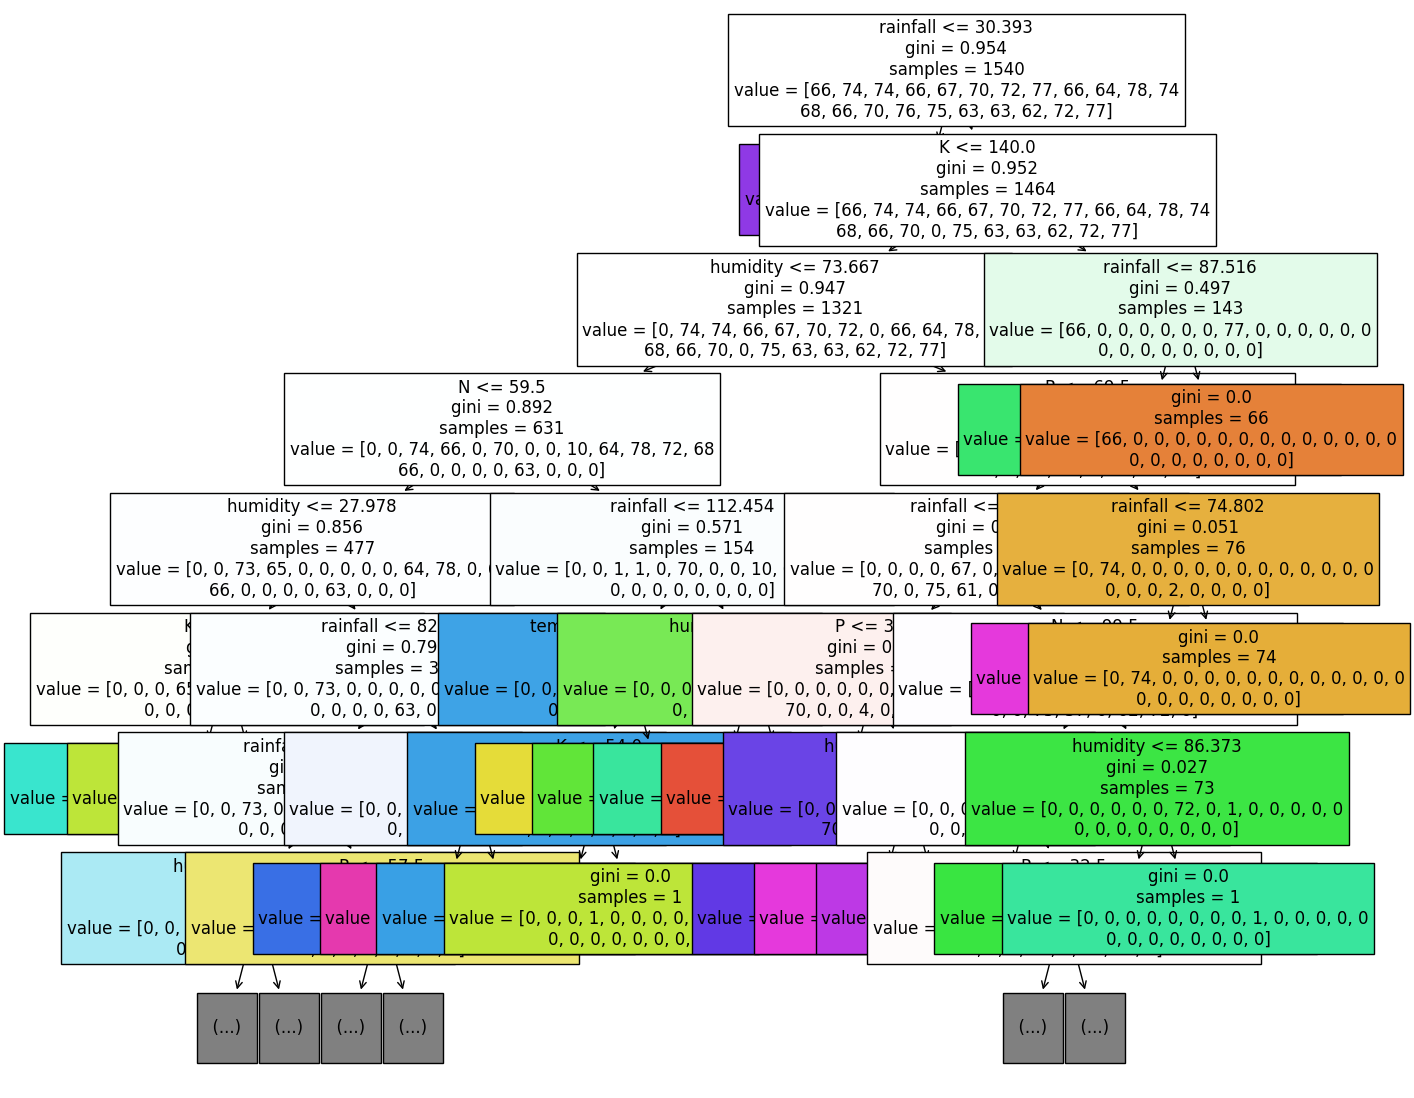

In [15]:
plt.figure(figsize=(14,14))
plot_tree(dt_classifier_gini,fontsize=12,max_depth=7,filled=True,feature_names=list(X.columns));

In [16]:
dt_classifier = load('/kaggle/working/cropPred.h5')

In [17]:
sample_input = pd.DataFrame({
    'N': [23],
    'P': [43],
    'K': [200],
    'temperature': [29.763],
    'humidity': [79.234],
    'ph': [6.5],
    'rainfall': [75.23]
})
data = [[23,43,200,29.763,79.234,6.5,75.23]]

if(dt_classifier.predict(sample_input)):
    print(dt_classifier.predict(sample_input))
else:
    print("No Suggestion")

['grapes']


In [18]:
import pandas as pd

# Create the sample DataFrame
sample_input = pd.DataFrame({
    'N': [23],
    'P': [43],
    'K': [200],
    'temperature': [29.763],
    'humidity': [79.234],
    'ph': [6.5],
    'rainfall': [75.23]
})

# Convert the DataFrame to a list of lists
list_of_lists = sample_input.values.tolist()

print(list_of_lists)

[[23.0, 43.0, 200.0, 29.763, 79.234, 6.5, 75.23]]
